In [12]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import seaborn as sns
from matplotlib import pyplot as plt

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_70e6e81cfcd747b2809c93c189899fac = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-puZysklZ_1tlx64esxlY3520RCsNrcYyc-ocB98POHf',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_70e6e81cfcd747b2809c93c189899fac.get_object(Bucket='usedcarpricingmodel-donotdelete-pr-hw4sbexae7dzjh',Key='true_car_listings.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)



In [13]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [14]:
df.dtypes


Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [15]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [16]:
df.describe(include=['object'])

,City,State,Vin,Make,Model
count,852122,852122,852122,852122,852122
unique,2553,59,852075,58,2736
top,Houston,TX,1GCPKPEX0AZ237480,Ford,Silverado
freq,12703,94654,2,110432,24932


In [17]:
df[(df["Mileage"]<=1000)].count()

Price      8751
Year       8751
Mileage    8751
City       8751
State      8751
Vin        8751
Make       8751
Model      8751
dtype: int64

In [18]:
df.corr()

,Price,Year,Mileage
Price,1.000000,0.401250,-0.421237
Year,0.401250,1.000000,-0.764849
Mileage,-0.421237,-0.764849,1.000000


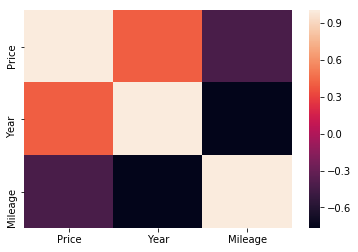

In [19]:
sns.heatmap(df.corr())


In [20]:
plt.show()

In [21]:
makes = df[['Model', 'Make']].groupby('Make').count()

In [22]:
makes = makes.reset_index()

In [23]:
plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

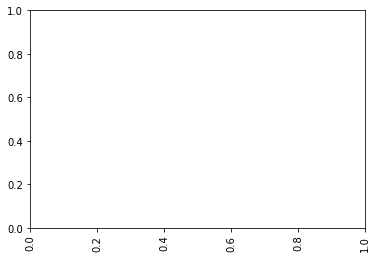

In [24]:
plt.xticks(rotation=90)

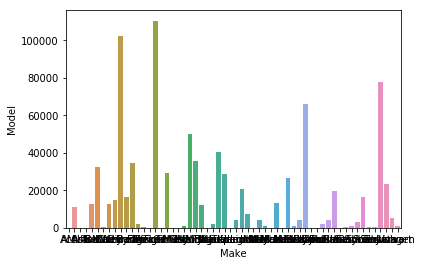

In [25]:
sns.barplot(y='Model', x='Make', data=makes)

In [26]:
plt.show()